# Detecting Bias in NBA Scorekeeping

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
mpgdf = pd.read_excel('Mean Point guard.xlsx')

In [4]:
mpgdf.head(5)

,NBA Team,Usage Rate,Points,Rebounds,Assists,Minutes Played,TeamFG%,TeamFG,TeamFGA,Team PPG
0,Boston,34.7,29.8,2.7,5.6,33.8,0.445961,39.2,87.9,105.4
1,Boston Away,33.8,28.0,2.4,6.2,33.8,0.430108,36.0,83.7,105.3
2,Cleveland,29.2,24.4,3.3,6.6,34.4,0.445067,39.7,89.2,104.6
3,Cleveland Away,32.5,26.1,3.0,5.0,35.7,0.470056,41.6,88.5,109.8
4,Toronto,23.9,21.8,4.6,7.0,37.5,0.446281,37.8,84.7,103.2


## Summary Statistics

In [7]:
mpgdf.describe()

,Usage Rate,Points,Rebounds,Assists,Minutes Played,TeamFG%,TeamFG,TeamFGA,Team PPG
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,26.028333,18.308333,4.248333,6.415000,31.620000,0.457114,39.025000,85.370877,105.595000
std,5.643723,6.509632,1.886678,1.984324,3.707986,0.014395,1.823215,2.916143,4.430649
min,14.400000,6.200000,1.500000,3.000000,24.300000,0.430108,33.900000,77.500000,94.800000
25%,22.250000,13.350000,3.225000,5.000000,29.100000,0.448420,37.875000,83.550000,102.975000
50%,26.350000,18.050000,3.950000,6.138333,32.500000,0.456287,39.100000,85.555000,105.700000
75%,29.000000,23.000000,4.675000,7.150000,34.325000,0.467137,40.075000,87.475000,109.075000
max,42.900000,32.100000,10.700000,11.400000,37.500000,0.486452,42.500000,90.900000,115.100000


#

In [63]:
meanur = mpgdf['Usage Rate'].mean()
meanur

26.028333333333332

In [64]:
meanast = mpgdf['Assists'].mean()
meanast

6.414999999999999

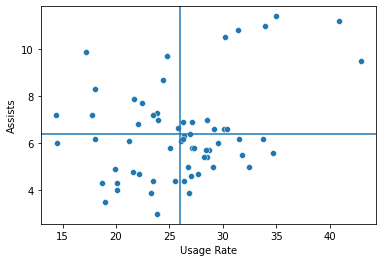

In [65]:

mpgscatter = sns.scatterplot(data = mpgdf, x = 'Usage Rate', y = 'Assists')
mpgscatter.axhline(mpgdf['Assists'].mean())
mpgscatter.axvline(mpgdf['Usage Rate'].mean())
# This is hard to make work 
# plt.text(mpgdf['Usage Rate' == ], y = y, s = 'Russell Westbrook')


## Importing Logistic Regression Dataset from Stata

In [6]:
nbadta = pd.read_stata('biasinNBAscorekeepingFINAL.dta')

In [7]:
nbadta.head(5)

,G,Date,Tm,Away,Opp,F,GS,MP,FG,FGA,...,PTS,GmSc,AB,USG,AD,TeamPPG,TeamFG,TripleDouble,TeamPPGPTS,lnPTS
0,1.0,2016-10-26,OKC,1.0,PHI,W (+6),1.0,1900-01-01 12:23:00,11.0,21.0,...,32.0,28.4,10.0,31.8,48.5,103.0,0.415,0,71.0,3.465736
1,2.0,2016-10-28,OKC,0.0,PHO,W (+3),1.0,1900-01-01 21:19:00,17.0,44.0,...,51.0,32.9,7.0,50.2,58.1,113.0,0.417,1,62.0,3.931826
2,3.0,2016-10-30,OKC,0.0,LAL,W (+17),1.0,1900-01-01 09:39:00,11.0,21.0,...,33.0,32.3,9.0,36.0,77.9,113.0,0.474,1,80.0,3.496508
3,4.0,2016-11-02,OKC,1.0,LAC,W (+2),1.0,1900-01-01 08:39:00,14.0,30.0,...,35.0,15.9,12.0,56.8,54.8,85.0,0.405,0,50.0,3.555348
4,5.0,2016-11-03,OKC,1.0,GSW,L (-26),1.0,1900-01-01 04:52:00,4.0,15.0,...,20.0,13.9,-9.0,39.2,58.7,96.0,0.402,0,76.0,2.995732


### Renaming Column

In [8]:
nbadta.rename(columns = {'TeamPPGPTS': 'tPPG'}, inplace = True)

### Removing an Extraneous Row and Columns

In [9]:
nbadta[0:82]

,G,Date,Tm,Away,Opp,F,GS,MP,FG,FGA,...,PTS,GmSc,AB,USG,AD,TeamPPG,TeamFG,TripleDouble,tPPG,lnPTS
0,1.0,2016-10-26,OKC,1.0,PHI,W (+6),1.0,1900-01-01 12:23:00.000,11.0,21.0,...,32.0,28.4,10.0,31.8,48.5,103.0,0.415,0,71.0,3.465736
1,2.0,2016-10-28,OKC,0.0,PHO,W (+3),1.0,1900-01-01 21:19:00.000,17.0,44.0,...,51.0,32.9,7.0,50.2,58.1,113.0,0.417,1,62.0,3.931826
2,3.0,2016-10-30,OKC,0.0,LAL,W (+17),1.0,1900-01-01 09:39:00.000,11.0,21.0,...,33.0,32.3,9.0,36.0,77.9,113.0,0.474,1,80.0,3.496508
3,4.0,2016-11-02,OKC,1.0,LAC,W (+2),1.0,1900-01-01 08:39:00.000,14.0,30.0,...,35.0,15.9,12.0,56.8,54.8,85.0,0.405,0,50.0,3.555348
4,5.0,2016-11-03,OKC,1.0,GSW,L (-26),1.0,1900-01-01 04:52:00.000,4.0,15.0,...,20.0,13.9,-9.0,39.2,58.7,96.0,0.402,0,76.0,2.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78.0,2017-04-05,OKC,1.0,MEM,W (+3),1.0,1900-01-01 13:32:00.000,14.0,25.0,...,45.0,37.0,2.0,44.3,67.0,103.0,0.435,0,58.0,3.806663
78,79.0,2017-04-07,OKC,1.0,PHO,L (-21),1.0,1900-01-01 12:24:00.000,6.0,25.0,...,23.0,10.2,-15.0,42.2,40.4,99.0,0.370,0,76.0,3.135494
79,80.0,2017-04-09,OKC,1.0,DEN,W (+1),1.0,1900-01-01 12:57:00.001,17.0,32.0,...,50.0,45.6,10.0,42.9,72.5,106.0,0.417,1,56.0,3.912023
80,81.0,2017-04-12,OKC,0.0,DEN,L (-6),1.0,1899-12-31 18:19:00.000,2.0,10.0,...,5.0,2.8,-5.0,28.3,55.5,105.0,0.426,0,100.0,1.609438


In [10]:
nbadta = nbadta[0:81]

In [11]:
nbadta.shape

(81, 35)

In [12]:
nbadta = nbadta.drop(columns=['MP', 'Tm', 'Opp', 'F'])

In [13]:
for col in nbadta.columns: 
    print(col)

G
Date
Away
GS
FG
FGA
K
P
PA
N
FT
FTA
Q
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
GmSc
AB
USG
AD
TeamPPG
TeamFG
TripleDouble
tPPG
lnPTS


In [14]:
print(len(col))

5


In [15]:
nbadta.describe()

,G,Away,GS,FG,FGA,K,P,PA,N,FT,...,PTS,GmSc,AB,USG,AD,TeamPPG,TeamFG,TripleDouble,tPPG,lnPTS
count,81.000000,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,0.493827,1.0,10.172840,23.962963,0.425136,2.469136,7.197531,0.331625,8.765432,...,31.580247,24.920988,3.086420,41.548148,56.488889,106.679012,0.452358,0.518519,75.098765,3.388211
std,23.526581,0.503077,0.0,3.859372,6.736921,0.119384,1.911063,3.396394,0.214090,3.921963,...,10.490310,9.161901,13.003074,7.794006,16.732633,10.901637,0.051112,0.502770,12.476583,0.387937
min,1.000000,0.000000,1.0,2.000000,6.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,5.000000,2.800000,-36.000000,20.100000,0.000000,80.000000,0.338000,0.000000,50.000000,1.609438
25%,21.000000,0.000000,1.0,7.000000,20.000000,0.333000,1.000000,5.000000,0.167000,6.000000,...,25.000000,20.200000,-6.000000,36.200000,46.400000,99.000000,0.419000,0.000000,64.000000,3.218876
50%,41.000000,0.000000,1.0,10.000000,23.000000,0.433000,2.000000,7.000000,0.300000,9.000000,...,31.000000,25.200000,7.000000,40.900000,56.500000,108.000000,0.454000,1.000000,75.000000,3.433987
75%,61.000000,1.000000,1.0,13.000000,28.000000,0.500000,3.000000,9.000000,0.475250,11.000000,...,38.000000,30.800000,12.000000,47.800000,65.700000,114.000000,0.494000,1.000000,83.000000,3.637586
max,81.000000,1.000000,1.0,21.000000,44.000000,1.000000,8.000000,16.000000,0.833000,17.000000,...,58.000000,45.600000,26.000000,58.000000,100.000000,132.000000,0.566000,1.000000,104.000000,4.060443


## Correlation Matrix

In [48]:
corr = nbadta[['Away', 'USG', 'PTS', 'AST', 'TRB', 'tPPG']].corr()

In [49]:
corr

,Away,USG,PTS,AST,TRB,tPPG
Away,1.000000,0.163779,0.046874,-0.220563,-0.017967,-0.272737
USG,0.163779,1.000000,0.640298,-0.520353,-0.210530,-0.729913
PTS,0.046874,0.640298,1.000000,-0.162785,0.096503,-0.561058
AST,-0.220563,-0.520353,-0.162785,1.000000,0.421763,0.559947
TRB,-0.017967,-0.210530,0.096503,0.421763,1.000000,0.101515
tPPG,-0.272737,-0.729913,-0.561058,0.559947,0.101515,1.000000


In [50]:
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Away,USG,PTS,AST,TRB,tPPG
Away,1.00,0.16,0.05,-0.22,-0.02,-0.27
USG,0.16,1.00,0.64,-0.52,-0.21,-0.73
PTS,0.05,0.64,1.00,-0.16,0.10,-0.56
AST,-0.22,-0.52,-0.16,1.00,0.42,0.56
TRB,-0.02,-0.21,0.10,0.42,1.00,0.10
tPPG,-0.27,-0.73,-0.56,0.56,0.10,1.00


## Logistic Regression

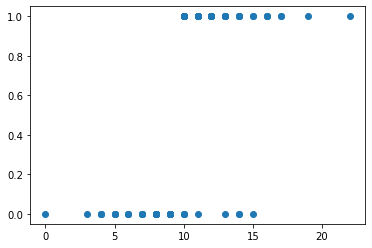

In [20]:
plt.scatter(nbadta.AST, nbadta.TripleDouble)

In [30]:
model = LogisticRegression()

### Creating a Training Set and Testing Set from nbadta

In [48]:
X_train, X_test, y_train, y_test = train_test_split(nbadta[['Away', 'USG', 'PTS', 'AST', 'TRB', 'tPPG']], nbadta.TripleDouble, test_size = 0.1)

In [49]:
X_test

,Away,USG,PTS,AST,TRB,tPPG
20,0.0,41.0,28.0,12.0,17.0,73.0
21,1.0,40.9,32.0,12.0,13.0,70.0
27,0.0,52.4,46.0,7.0,11.0,62.0
79,1.0,42.9,50.0,10.0,16.0,56.0
73,1.0,52.4,57.0,11.0,13.0,57.0
17,0.0,34.3,17.0,15.0,13.0,89.0
54,0.0,49.3,47.0,8.0,11.0,67.0
46,0.0,49.7,45.0,3.0,8.0,64.0
10,1.0,42.2,33.0,8.0,15.0,55.0


In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int8)

In [53]:
model.score(X_test, y_test)

1.0

In [54]:
model.predict_proba(X_test)

array([[0.01867117, 0.98132883],
       [0.18569862, 0.81430138],
       [0.80380441, 0.19619559],
       [0.17357396, 0.82642604],
       [0.15445901, 0.84554099],
       [0.0175965 , 0.9824035 ],
       [0.6771168 , 0.3228832 ],
       [0.99654575, 0.00345425],
       [0.67733876, 0.32266124]])